In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from models.variational_autoencoder import VariationalAutoencoder
from models.bayesian_autoencoder import BayesianAutoencoder
from models.variational_conv_autoencoder import VariationalConvAutoencoder
from models.bayesian_conv_autoencoder import BayesianConvAutoencoder
from models.bayesian_vae import BayesianVAE
from models.GAN import AAE

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-im

# VAE

In [12]:
VAE = VariationalAutoencoder('VAE', n_neurons_encoder=[128, 64], n_latent=2, n_neurons_decoder=[64, 128])
VAE.restore('DUMPS/vae/VAE_128_64_2')

VAE VAE
 --> Encoder
    w:  (784, 128)  |  b: (128,)
    w:  (128, 64)  |  b: (64,)
 --> Latent Space
    Mu.     w: (64, 2)  |  b: (2,)
    Sigma2. w: (64, 2)  |  b: (2,)
 --> Decoder
    w:  (2, 64)  |  b: (64,)
    w:  (64, 128)  |  b: (128,)
    w:  (128, 784)  |  b: (784,)
INFO:tensorflow:Restoring parameters from DUMPS/vae/VAE_128_64_2
Model restored from file: DUMPS/vae/VAE_128_64_2


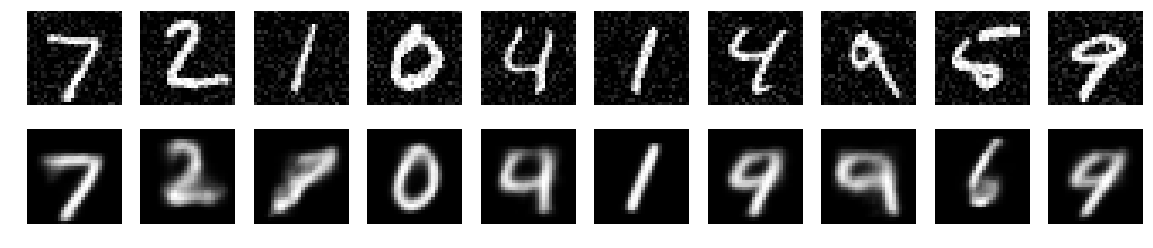

In [13]:
VAE.plot_noisy_recon()

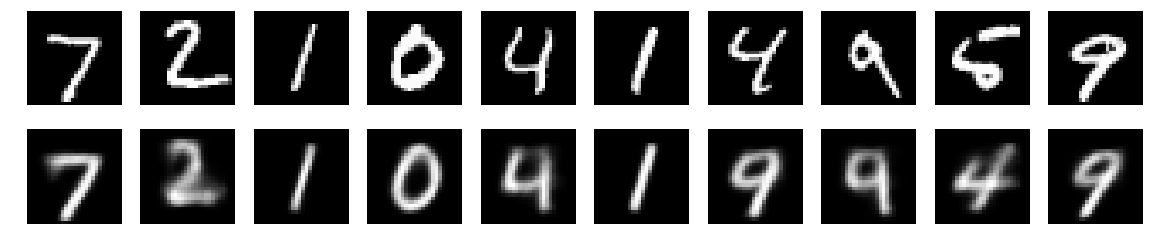

In [15]:
VAE.plot_recon()

# VCAE

In [3]:
VCAE = VariationalConvAutoencoder('VCAE', n_inputs=784,
                 n_conv_maps = [10, 10, 10],
                 n_conv_filters = [3, 3, 3], 
                 n_conv_strides = [2, 2, 2], 
                 n_conv_padding = ['SAME', 'SAME', 'VALID'], 
                 n_dense = [64],
                 n_latent=2)
VCAE.restore('DUMPS/vcae/VCAE_3x3_10_3')

VCAE VCAE
 --> Encoder
(?, 28, 28, 1)
(?, 14, 14, 10)
(?, 7, 7, 10)
(?, 3, 3, 10)
(?, 90)
(?, 64)
 --> Latent space
(?, 2)
 --> Decoder
(?, 64)
(?, 90)
(?, 3, 3, 10)
(?, 7, 7, 10)
(?, 14, 14, 10)
(?, 28, 28, 1)
(?, 784)
INFO:tensorflow:Restoring parameters from DUMPS/vcae/VCAE_3x3_10_3
Model restored from file: DUMPS/vcae/VCAE_3x3_10_3


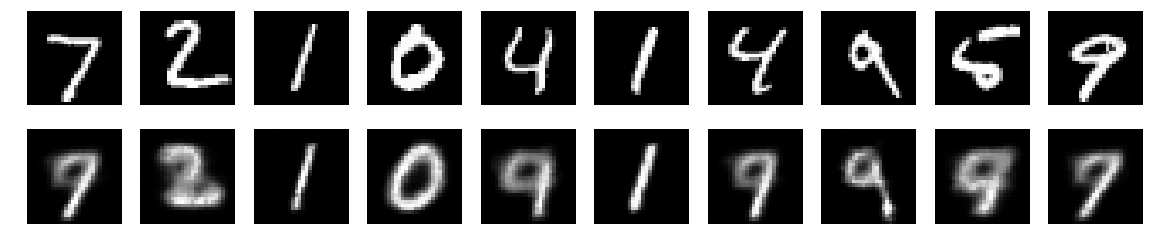

In [4]:
VCAE.plot_recon(10)

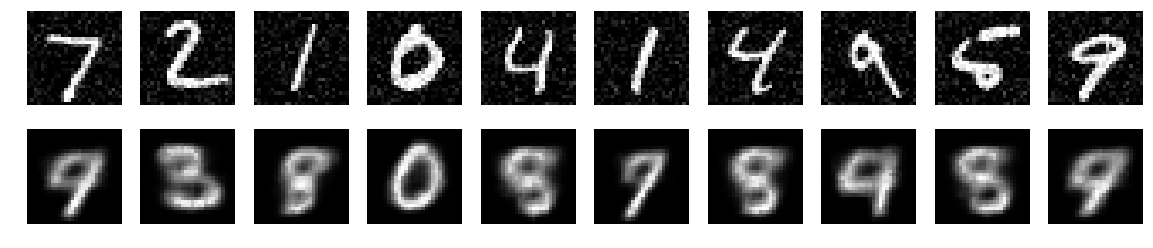

In [5]:
VCAE.plot_noisy_recon(10)

# AAE

In [8]:
AdvAE = AAE('AdvAE', n_inputs = 784, n_neurons_encoder=[128, 64], n_latent=2, n_neurons_decoder=[64, 128])

In [13]:
AdvAE.restore('DUMPS/aae/AAE_128_64_2')

INFO:tensorflow:Restoring parameters from DUMPS/aae/AAE_128_64_2


DataLossError: Unable to open table file DUMPS\aae\AAE_128_64_2: Unknown: NewRandomAccessFile failed to Create/Open: DUMPS\aae\AAE_128_64_2 : Acceso denegado.
; Input/output error
	 [[Node: save_4/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_4/Const_0, save_4/RestoreV2_3/tensor_names, save_4/RestoreV2_3/shape_and_slices)]]
	 [[Node: save_4/RestoreV2_12/_33 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_90_save_4/RestoreV2_12", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save_4/RestoreV2_3', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-28620005a989>", line 1, in <module>
    AdvAE.restore('DUMPS/aae/AAE_128_64_2')
  File "C:\Users\AlbertoIbarrondo\AnacondaProjects\Variational Autoencoders\models\GAN.py", line 390, in restore
    saver = tf.train.Saver()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1056, in __init__
    self.build()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

DataLossError (see above for traceback): Unable to open table file DUMPS\aae\AAE_128_64_2: Unknown: NewRandomAccessFile failed to Create/Open: DUMPS\aae\AAE_128_64_2 : Acceso denegado.
; Input/output error
	 [[Node: save_4/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_4/Const_0, save_4/RestoreV2_3/tensor_names, save_4/RestoreV2_3/shape_and_slices)]]
	 [[Node: save_4/RestoreV2_12/_33 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_90_save_4/RestoreV2_12", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
AdvAE.plot_enc_dec()

In [ ]:
AdvAE.plot_noisy_recon(10)

# BCAE

In [17]:
BCAE = BayesianConvAutoencoder('BCAE', 10)

In [18]:
BCAE.restore('DUMPS/bcae')

INFO:tensorflow:Restoring parameters from DUMPS/bcae


DataLossError: Unable to open table file DUMPS\bcae: Unknown: NewRandomAccessFile failed to Create/Open: DUMPS\bcae : Acceso denegado.
; Input/output error
	 [[Node: save/RestoreV2_15 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_15/tensor_names, save/RestoreV2_15/shape_and_slices)]]
	 [[Node: save/RestoreV2_32/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_79_save/RestoreV2_32", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2_15', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-d867b43befdb>", line 1, in <module>
    BCAE.restore('DUMPS/bcae')
  File "C:\Users\AlbertoIbarrondo\AnacondaProjects\Variational Autoencoders\models\bayesian_conv_autoencoder.py", line 472, in restore
    saver = tf.train.Saver()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1056, in __init__
    self.build()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

DataLossError (see above for traceback): Unable to open table file DUMPS\bcae: Unknown: NewRandomAccessFile failed to Create/Open: DUMPS\bcae : Acceso denegado.
; Input/output error
	 [[Node: save/RestoreV2_15 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_15/tensor_names, save/RestoreV2_15/shape_and_slices)]]
	 [[Node: save/RestoreV2_32/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_79_save/RestoreV2_32", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
BCAE.plot_enc_dec()

In [ ]:
BCAE.plot_noisy_recon(10)

# BAE

In [19]:
BAE = BayesianAutoencoder('BAE', n_inputs = 784, n_neurons_encoder=[128, 64], n_latent=2, n_neurons_decoder=[64, 128])

TypeError: Expected int32, got Dimension(785) of type 'Dimension' instead.

In [ ]:
BAE.restore('DUMPS/bae/BAE_128_64_2')

In [ ]:
BAE.plot_enc_dec()

In [ ]:
BAE.plot_noisy_recon(10)

# BVAE

In [20]:
BVAE = BayesianVAE('BVAE', n_inputs = 784, n_neurons_encoder=[128, 64], n_latent=2, n_neurons_decoder=[64, 128])

TypeError: Expected int32, got Dimension(785) of type 'Dimension' instead.

In [ ]:
BVAE.restore('DUMPS/bvae/bvae_simple')

In [ ]:
BVAE.plot_enc_dec()

In [ ]:
BVAE.plot_noisy_recon(10)